### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load data

In [2]:
df22=pd.read_csv('diem_thi_thpt_2022.csv')

In [3]:
df22.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25


In [4]:
df23=pd.read_csv('diem_thi_thpt_2023.csv')

In [5]:
df23.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,8.50,9.2,NaN,NaN,NaN,6.75,6.00,9.00,N1
1,1000002,7.2,8.50,9.2,NaN,NaN,NaN,8.75,6.50,8.50,N1
2,1000003,NaN,6.50,NaN,NaN,NaN,NaN,9.25,7.50,NaN,NaN
3,1000004,7.8,8.25,7.8,NaN,NaN,NaN,4.50,6.25,8.25,N1
4,1000005,7.2,8.00,7.8,NaN,NaN,NaN,4.75,6.75,8.25,N1


In [6]:
df24=pd.read_csv('diem_thi_thpt_2024.csv')

In [7]:
df24.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1
2,1000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1
3,1000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1
4,1000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1


### Data cleaning

In [8]:
df22['ma_ngoai_ngu']=float('nan')

In [9]:
df22.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,NaN
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,NaN
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,NaN
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,NaN
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,NaN


In [10]:
df22['year']=2022
df23['year']=2023
df24['year']=2024

In [11]:
df=pd.concat([df22,df23,df24],axis=0,ignore_index=True)

In [12]:
df.sample(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year
2222824,3010194,5.2,8.75,4.0,NaN,NaN,NaN,6.5,6.25,8.5,N1,2024
345671,18006556,7.4,6.75,6.8,7.25,7.75,3.5,NaN,NaN,NaN,NaN,2022


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079106 entries, 0 to 3079105
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sbd           int64  
 1   toan          float64
 2   ngu_van       float64
 3   ngoai_ngu     float64
 4   vat_li        float64
 5   hoa_hoc       float64
 6   sinh_hoc      float64
 7   lich_su       float64
 8   dia_li        float64
 9   gdcd          float64
 10  ma_ngoai_ngu  object 
 11  year          int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 281.9+ MB


### Analysis

In [14]:
data=df.copy()

In [15]:
students_per_year=data['year'].value_counts().sort_index()

In [16]:
growth_rate=students_per_year.pct_change() * 100

In [17]:
students_growth_df = pd.DataFrame({
    'so_luong_thi_sinh': students_per_year,
    'ty_le_tang_truong': growth_rate
}).reset_index().rename(columns={'index': 'year'})

In [18]:
students_growth_df

,year,so_luong_thi_sinh,ty_le_tang_truong
0,2022,995441,NaN
1,2023,1022060,2.674091
2,2024,1061605,3.869147


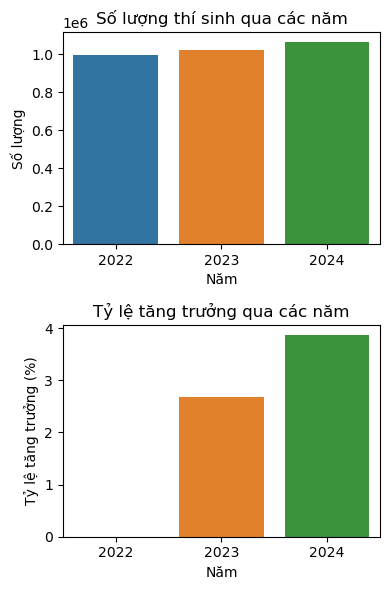

In [19]:
fig, axes =plt.subplots(2,1,figsize=(4,6))

sns.barplot(
    data=students_growth_df,
    x='year',
    y='so_luong_thi_sinh',
    ax=axes[0]
)
axes[0].set_title('Số lượng thí sinh qua các năm')
axes[0].set_xlabel('Năm')
axes[0].set_ylabel('Số lượng')

sns.barplot(
    data=students_growth_df,
    x='year',
    y='ty_le_tang_truong',
    ax=axes[1]
)
axes[1].set_title('Tỷ lệ tăng trưởng qua các năm')
axes[1].set_ylabel('Tỷ lệ tăng trưởng (%)')
axes[1].set_xlabel('Năm')
plt.tight_layout()
plt.show()

### Score distribution over years

In [20]:
subjects=['toan','ngu_van','ngoai_ngu','vat_li','hoa_hoc','sinh_hoc','lich_su','dia_li','gdcd']

### Average score for each subject over the years

In [21]:
mean_score_by_year= data.groupby('year')[subjects].mean().reset_index()

In [22]:
mean_score_by_year

,year,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,2022,6.466254,6.507746,5.157686,6.723779,6.703898,5.019109,6.343930,6.677929,8.033266
1,2023,6.250557,6.858194,5.462410,6.573900,6.744646,6.394933,6.025629,6.147523,8.285805
2,2024,6.447309,7.231146,5.521938,6.666866,6.680830,6.284079,6.570343,7.193541,8.156503


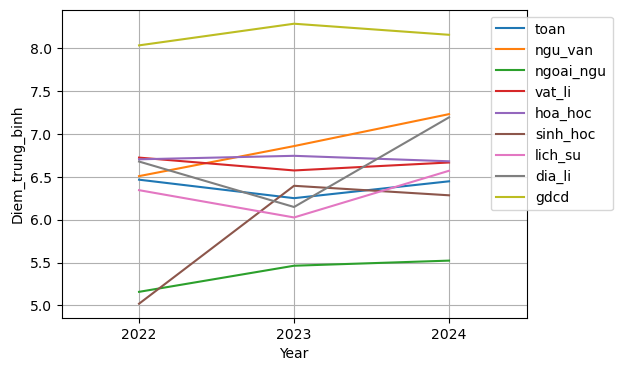

In [23]:
plt.figure(figsize=(6,4))
for i,subject in enumerate(subjects):
    sns.lineplot(
        data=mean_score_by_year,
        x='year',
        y=subject,
        label=f'{subject}'
     )
plt.xlabel('Year')
plt.ylabel('Diem_trung_binh')
plt.xlim(2021.5,2024.5)
plt.xticks(range(2022,2025,1))
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))
plt.grid(True)
plt.show()

### Scores for each subject over the years

In [24]:
title=['Toán','Văn','Anh','Lí','Hóa','Sinh','Sử','Địa','CD']
x_year=[2022,2023,2024]

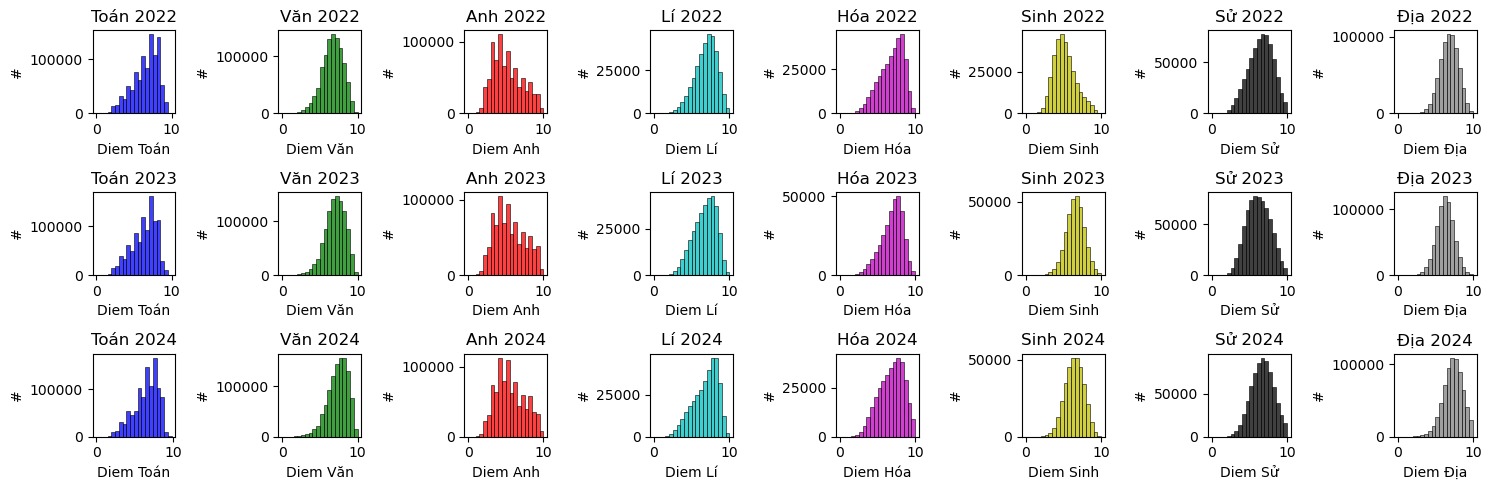

In [25]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#808080']
fig, axes =plt.subplots(3,8, figsize=(15,5))
for i, year in enumerate(x_year):
    for j,(subject,color) in enumerate(zip(subjects,colors)):
        sns.histplot(
            data[data.year==year][subject],
            ax=axes[i,j],
            bins=20,
            color=color
        )
        axes[i,j].set_title(f'{title[j]} {year}')
        axes[i,j].set_xlabel(f'Diem {title[j]}')
        axes[i,j].set_ylabel('#')
plt.tight_layout()
plt.show()

### Subject

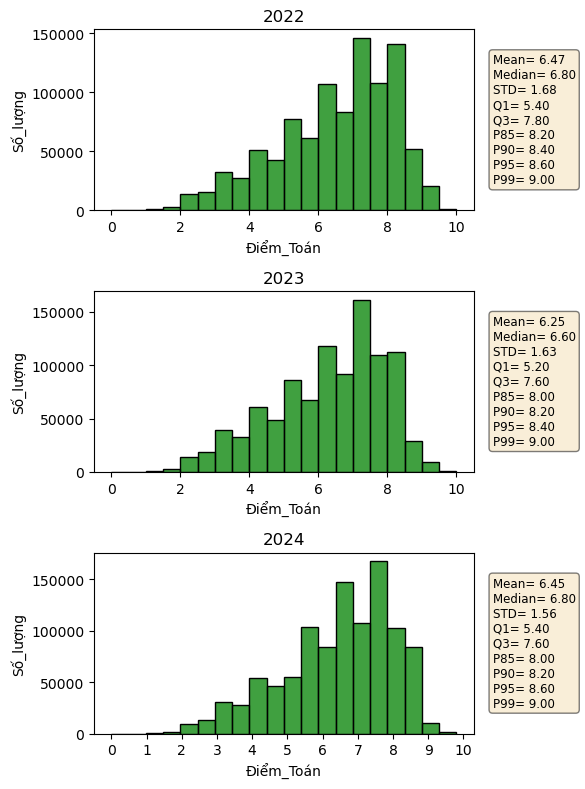

In [26]:
fig, axes=plt.subplots(3,1,figsize=(6,8))
for i,year in enumerate(x_year):
    sns.histplot(
        data[data.year==year]['toan'],
        ax=axes[i],
        bins=20,
        kde=False,
        edgecolor='black',
        color='g'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_Toán')
    axes[i].set_ylabel('Số_lượng')
    
    year_data=data[data.year==year]['toan'].dropna()
    mean=year_data.mean()
    median=year_data.median()
    std=year_data.std()
    Q1=year_data.quantile(0.25)
    Q3=year_data.quantile(0.75)
    p85=year_data.quantile(0.85)
    p90=year_data.quantile(0.90)
    p95=year_data.quantile(0.95)
    p99=year_data.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.xticks(range(0,11,1))
plt.tight_layout()
plt.show()

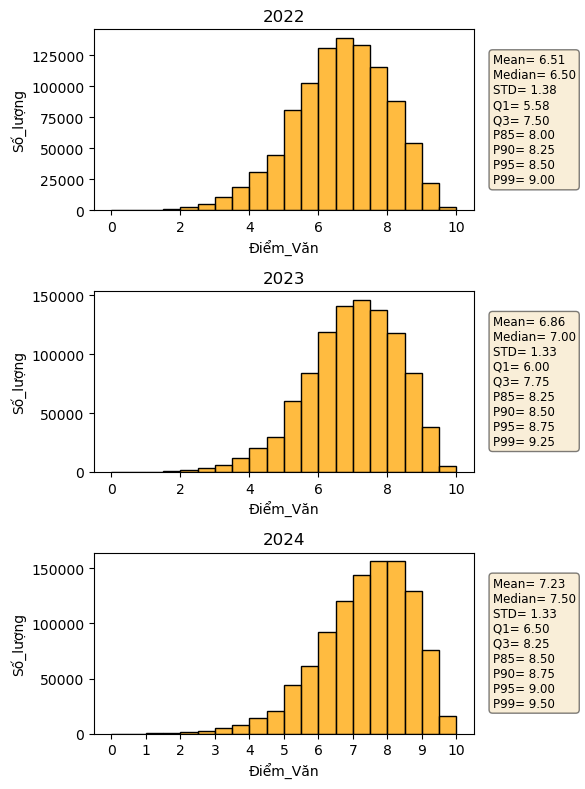

In [27]:
fig, axes=plt.subplots(3,1,figsize=(6,8))
for i,year in enumerate(x_year):
    sns.histplot(
        data[data.year==year]['ngu_van'],
        ax=axes[i],
        bins=20,
        kde=False,
        edgecolor='black',
        color='orange'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_Văn')
    axes[i].set_ylabel('Số_lượng')
    
    year_data=data[data.year==year]['ngu_van'].dropna()
    mean=year_data.mean()
    median=year_data.median()
    std=year_data.std()
    Q1=year_data.quantile(0.25)
    Q3=year_data.quantile(0.75)
    p85=year_data.quantile(0.85)
    p90=year_data.quantile(0.90)
    p95=year_data.quantile(0.95)
    p99=year_data.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.xticks(range(0,11,1))
plt.tight_layout()
plt.show()

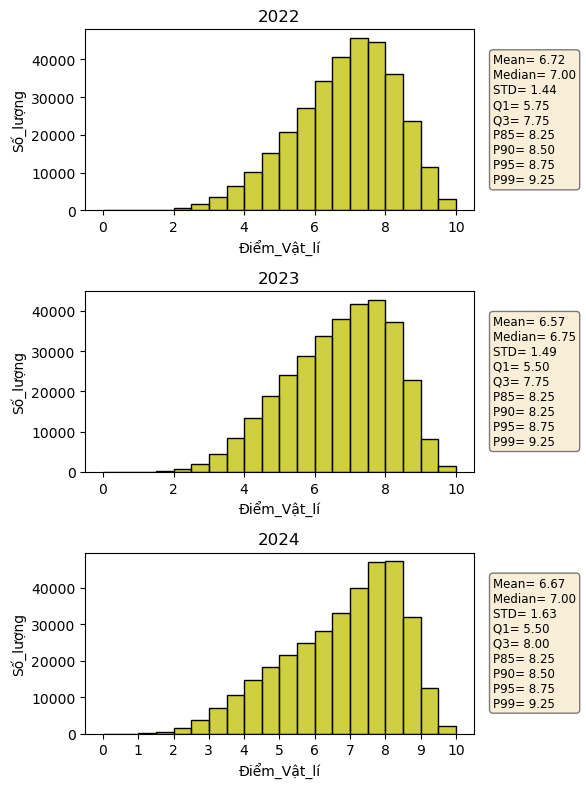

In [28]:
fig, axes=plt.subplots(3,1,figsize=(6,8))
for i,year in enumerate(x_year):
    sns.histplot(
        data[data.year==year]['vat_li'],
        ax=axes[i],
        bins=20,
        kde=False,
        edgecolor='black',
        color='y'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_Vật_lí')
    axes[i].set_ylabel('Số_lượng')
    
    year_data=data[data.year==year]['vat_li'].dropna()
    mean=year_data.mean()
    median=year_data.median()
    std=year_data.std()
    Q1=year_data.quantile(0.25)
    Q3=year_data.quantile(0.75)
    p85=year_data.quantile(0.85)
    p90=year_data.quantile(0.90)
    p95=year_data.quantile(0.95)
    p99=year_data.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.xticks(range(0,11,1))
plt.tight_layout()
plt.show()

### Compare with previous years

In [29]:
df_filtered=data.sample(frac=0.3,random_state=1)

In [30]:
df_filtered.sample(5)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year
2775566,41007871,8.0,7.00,8.2,8.0,8.50,6.0,NaN,NaN,NaN,N1,2024
2586341,29007443,4.2,5.25,3.6,NaN,NaN,NaN,6.0,8.25,7.0,N1,2024
785787,48003865,8.0,7.00,5.8,7.5,7.75,5.5,NaN,NaN,NaN,NaN,2022
2752040,40005179,7.8,8.00,5.4,5.0,7.00,5.0,NaN,NaN,NaN,N1,2024
832681,50004064,8.2,5.75,5.8,6.5,8.50,8.0,NaN,NaN,NaN,NaN,2022


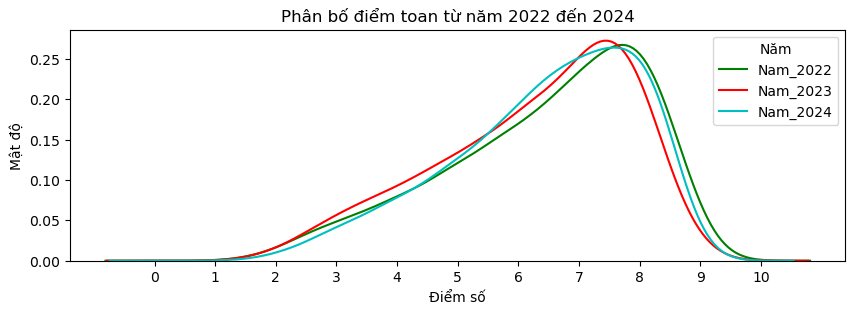

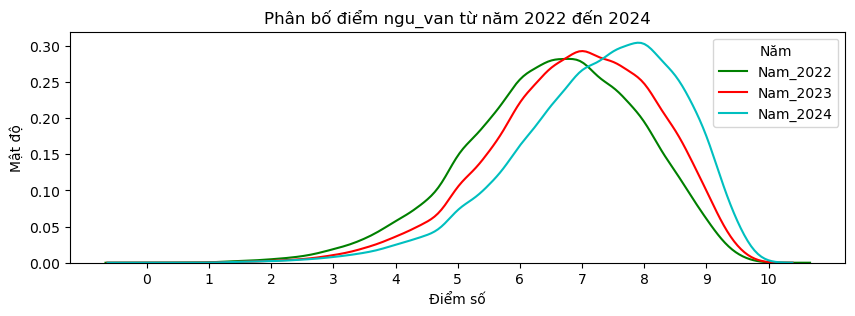

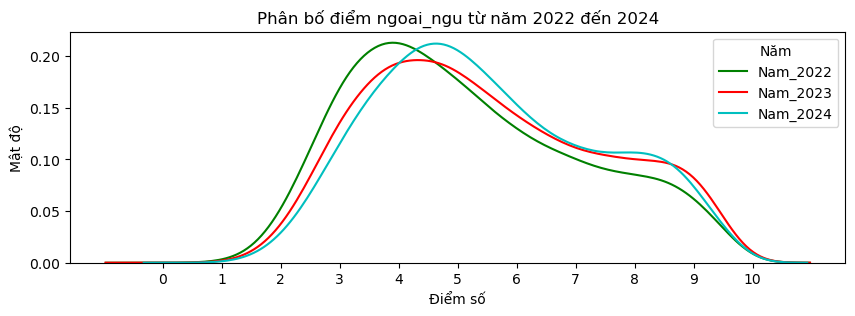

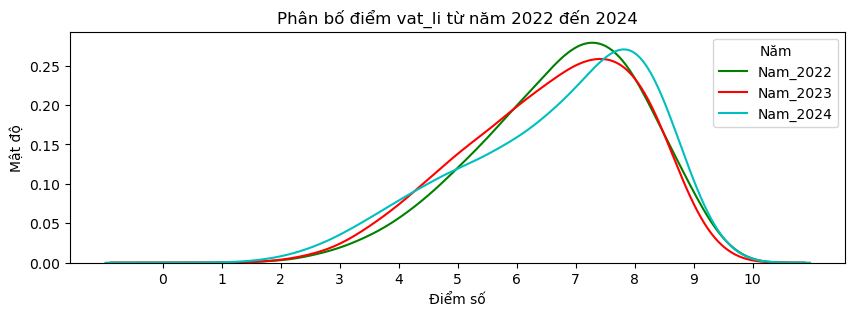

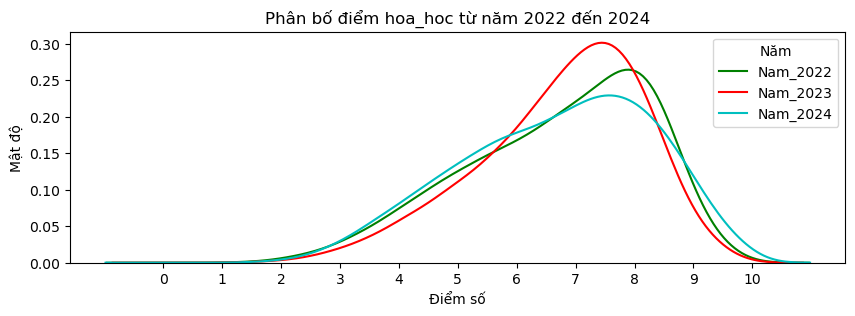

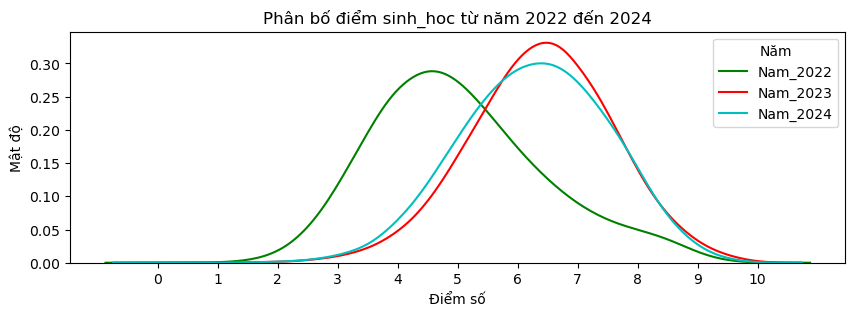

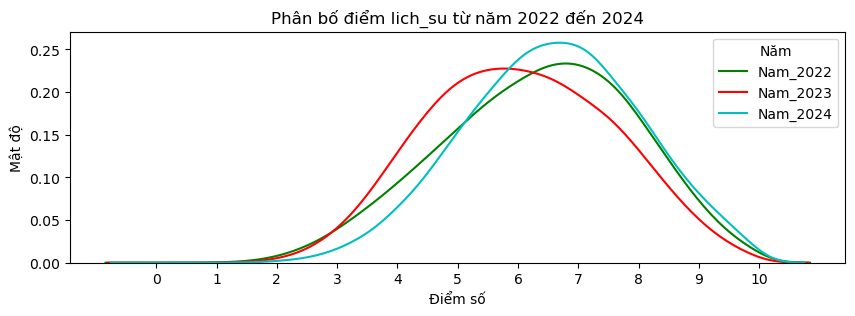

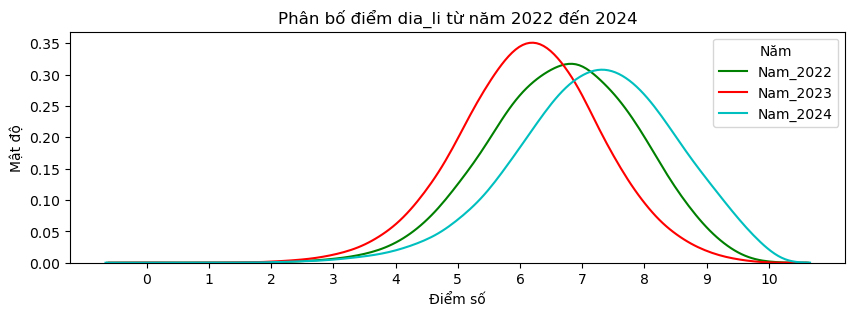

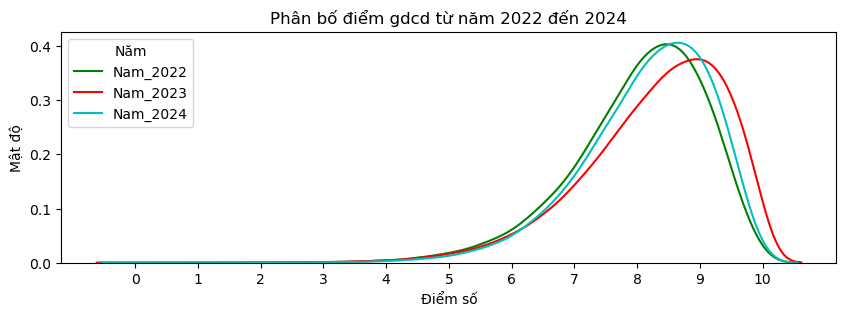

In [31]:
colors = ['g', 'r', 'c']
for i in subjects:
    plt.figure(figsize=(10,3))
    for year,color in (zip(x_year,colors)):
        df1=df_filtered[df_filtered.year==year][i].dropna()
        sns.kdeplot(
            data=df1,
            label=f'Nam_{year}',
            color=color,
            bw_adjust=2
        )
    plt.title(f'Phân bố điểm {i} từ năm 2022 đến 2024')
    plt.xlabel('Điểm số')
    plt.ylabel('Mật độ')
    plt.xticks(range(0,11,1))
    plt.legend(title='Năm')
    plt.grid(False)
    plt.show()

### Group distribution

In [32]:
df_filtered['A']=df_filtered['toan']+df_filtered['vat_li']+df_filtered['hoa_hoc']
df_filtered['A1']=df_filtered['toan']+df_filtered['vat_li']+df_filtered['ngoai_ngu']
df_filtered['B']=df_filtered['toan']+df_filtered['sinh_hoc']+df_filtered['hoa_hoc']
df_filtered['C']=df_filtered['ngu_van']+df_filtered['lich_su']+df_filtered['dia_li']
df_filtered['D']=df_filtered['toan']+df_filtered['ngu_van']+df_filtered['ngoai_ngu']

In [33]:
df_filtered.sample(5)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year,A,A1,B,C,D
2181115,2056036,6.0,6.00,8.0,NaN,NaN,NaN,7.00,8.50,7.00,N1,2024,NaN,NaN,NaN,21.50,20.00
1170147,2072635,5.4,6.50,NaN,NaN,NaN,NaN,5.50,7.25,NaN,NaN,2023,NaN,NaN,NaN,19.25,NaN
2626968,30011305,2.4,4.75,NaN,NaN,NaN,NaN,2.50,4.75,NaN,NaN,2024,NaN,NaN,NaN,12.00,NaN
1389411,21007565,7.2,9.00,4.4,NaN,NaN,NaN,6.25,5.75,7.75,N1,2023,NaN,NaN,NaN,21.00,20.60
1453950,25015459,7.6,6.25,5.8,NaN,NaN,NaN,7.25,6.50,8.75,N1,2023,NaN,NaN,NaN,20.00,19.65


In [34]:
combinations=['A','A1','B','C','D']

### Scores for group distribution over the years

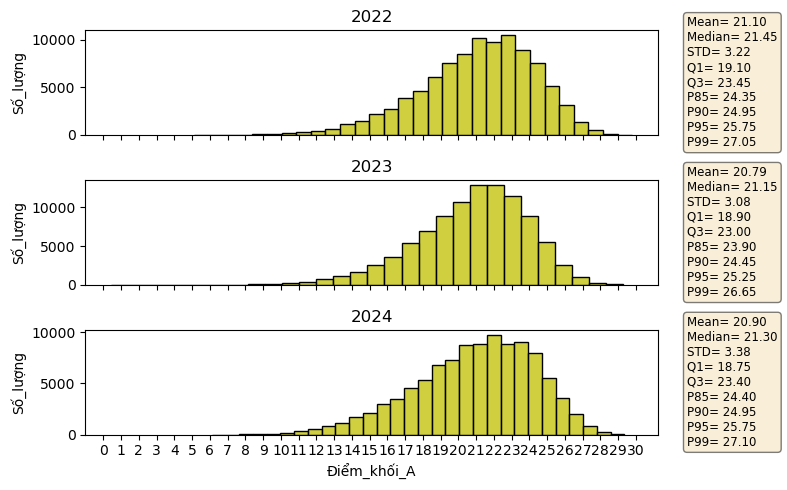

In [35]:
fig, axes= plt.subplots(3,1, figsize=(8,5),sharex=True )

for i,year in enumerate(x_year):
    sns.histplot(
        data=df_filtered[df_filtered.year==year]['A'].dropna(),
        bins=30,
        ax=axes[i],
        kde=False,
        edgecolor='black',
        color='y'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_khối_A')
    axes[i].set_ylabel('Số_lượng')
    axes[i].set_xticks(range(0,31,1))
    
    df_A=df_filtered[df_filtered.year==year]['A'].dropna()
    mean=df_A.mean()
    median=df_A.median()
    std=df_A.std()
    Q1=df_A.quantile(0.25)
    Q3=df_A.quantile(0.75)
    p85=df_A.quantile(0.85)
    p90=df_A.quantile(0.90)
    p95=df_A.quantile(0.95)
    p99=df_A.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.tight_layout()
plt.show()

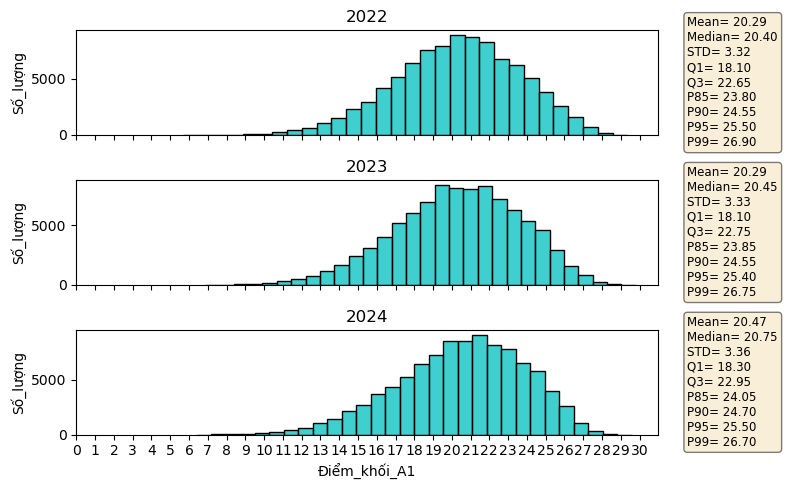

In [36]:
fig, axes= plt.subplots(3,1, figsize=(8,5),sharex=True )

for i,year in enumerate(x_year):
    sns.histplot(
        data=df_filtered[df_filtered.year==year]['A1'].dropna(),
        bins=30,
        ax=axes[i],
        kde=False,
        edgecolor='black',
        color='c'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_khối_A1')
    axes[i].set_ylabel('Số_lượng')
    axes[i].set_xticks(range(0,31,1))
    
    df_A1=df_filtered[df_filtered.year==year]['A1'].dropna()
    mean=df_A1.mean()
    median=df_A1.median()
    std=df_A1.std()
    Q1=df_A1.quantile(0.25)
    Q3=df_A1.quantile(0.75)
    p85=df_A1.quantile(0.85)
    p90=df_A1.quantile(0.90)
    p95=df_A1.quantile(0.95)
    p99=df_A1.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.tight_layout()
plt.show()

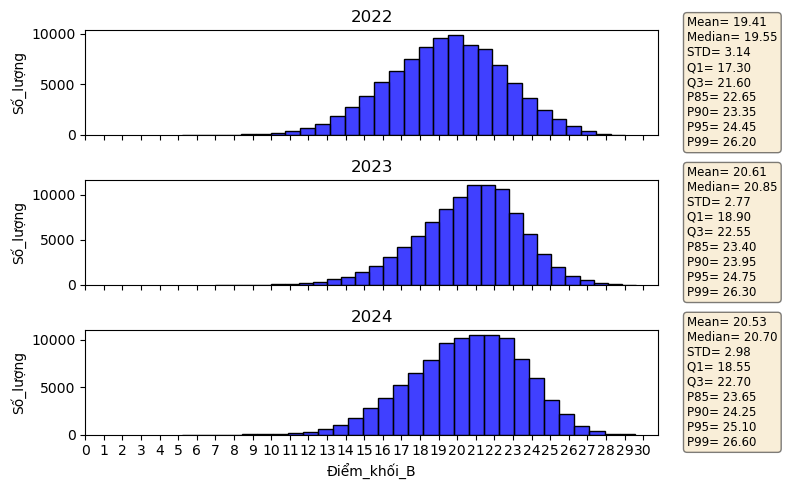

In [37]:
fig, axes= plt.subplots(3,1, figsize=(8,5),sharex=True )

for i,year in enumerate(x_year):
    sns.histplot(
        data=df_filtered[df_filtered.year==year]['B'].dropna(),
        bins=30,
        ax=axes[i],
        kde=False,
        edgecolor='black',
        color='b'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_khối_B')
    axes[i].set_ylabel('Số_lượng')
    axes[i].set_xticks(range(0,31,1))
    
    df_B=df_filtered[df_filtered.year==year]['B'].dropna()
    mean=df_B.mean()
    median=df_B.median()
    std=df_B.std()
    Q1=df_B.quantile(0.25)
    Q3=df_B.quantile(0.75)
    p85=df_B.quantile(0.85)
    p90=df_B.quantile(0.90)
    p95=df_B.quantile(0.95)
    p99=df_B.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.tight_layout()
plt.show()

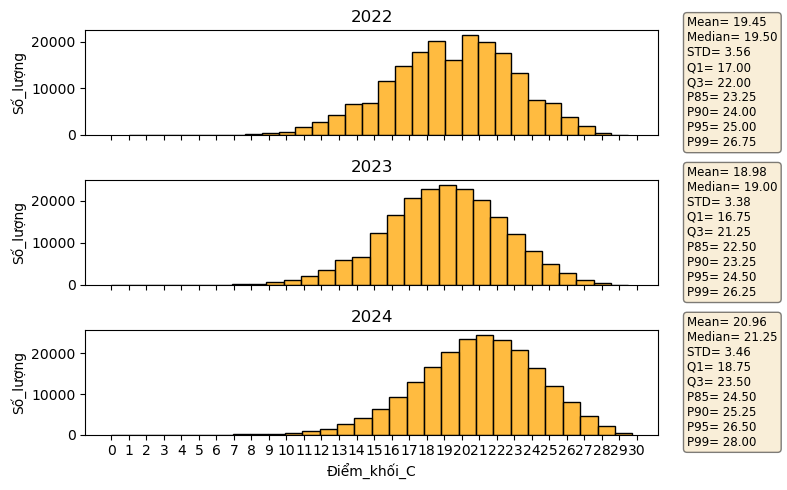

In [38]:
fig, axes= plt.subplots(3,1, figsize=(8,5),sharex=True )

for i,year in enumerate(x_year):
    sns.histplot(
        data=df_filtered[df_filtered.year==year]['C'].dropna(),
        bins=30,
        ax=axes[i],
        kde=False,
        edgecolor='black',
        color='orange'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_khối_C')
    axes[i].set_ylabel('Số_lượng')
    axes[i].set_xticks(range(0,31,1))
    
    df_C=df_filtered[df_filtered.year==year]['C'].dropna()
    mean=df_C.mean()
    median=df_C.median()
    std=df_C.std()
    Q1=df_C.quantile(0.25)
    Q3=df_C.quantile(0.75)
    p85=df_C.quantile(0.85)
    p90=df_C.quantile(0.90)
    p95=df_C.quantile(0.95)
    p99=df_C.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.tight_layout()
plt.show()

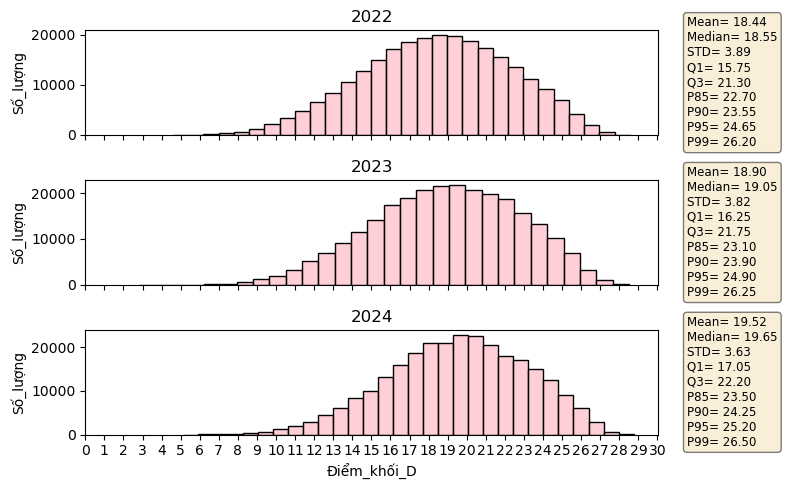

In [39]:
fig, axes= plt.subplots(3,1, figsize=(8,5),sharex=True )

for i,year in enumerate(x_year):
    sns.histplot(
        data=df_filtered[df_filtered.year==year]['D'].dropna(),
        bins=30,
        ax=axes[i],
        kde=False,
        edgecolor='black',
        color='pink'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_khối_D')
    axes[i].set_ylabel('Số_lượng')
    axes[i].set_xticks(range(0,31,1))
    
    df_D=df_filtered[df_filtered.year==year]['D'].dropna()
    mean=df_D.mean()
    median=df_D.median()
    std=df_D.std()
    Q1=df_D.quantile(0.25)
    Q3=df_D.quantile(0.75)
    p85=df_D.quantile(0.85)
    p90=df_D.quantile(0.90)
    p95=df_D.quantile(0.95)
    p99=df_D.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.tight_layout()
plt.show()

### Compare with previous years

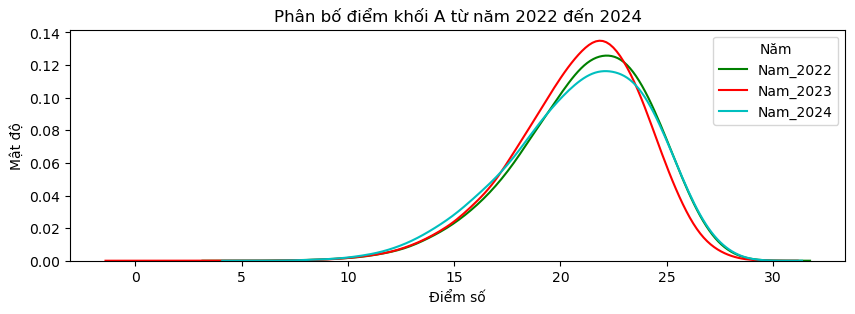

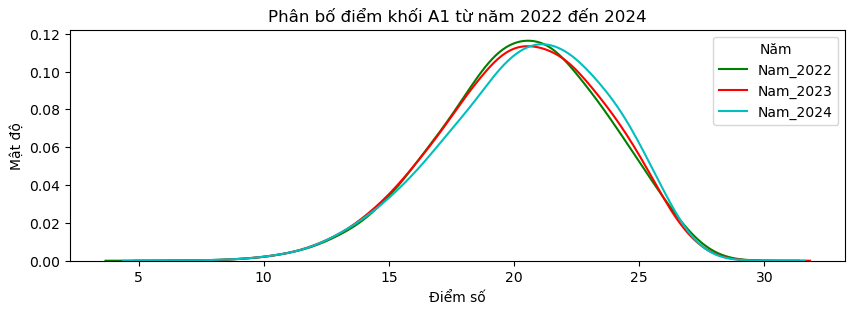

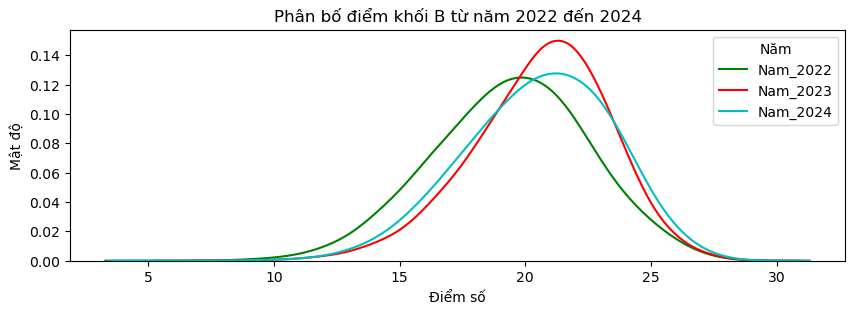

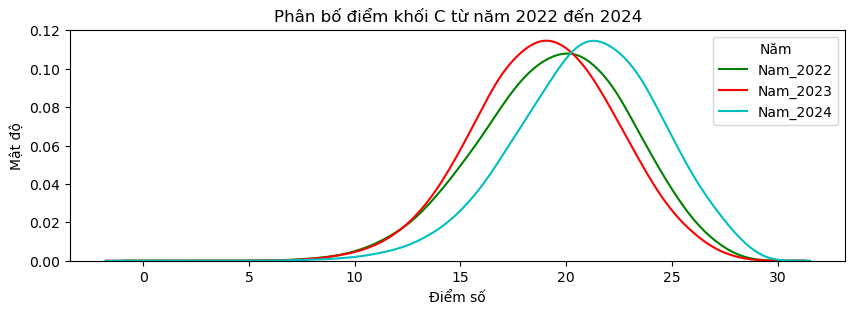

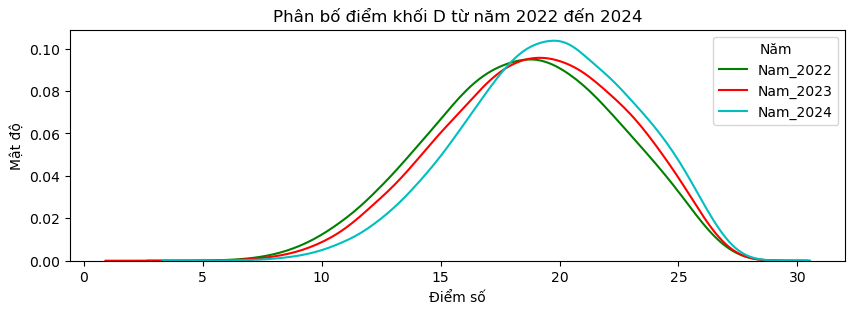

In [40]:
for i in combinations:
    plt.figure(figsize=(10,3))
    for year,color in (zip(x_year,colors)):
        df2=df_filtered[df_filtered.year==year][i].dropna()
        sns.kdeplot(
            data=df2,
            label=f'Nam_{year}',
            color=color,
            bw_adjust=2
        )
    plt.title(f'Phân bố điểm khối {i} từ năm 2022 đến 2024')
    plt.xlabel('Điểm số')
    plt.ylabel('Mật độ')
    plt.legend(title='Năm')
    plt.grid(False)
    plt.show()

### Correlation

In [41]:
df_score=df_filtered.loc[df_filtered.year==2024,subjects]

In [42]:
df_score.head()

,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
2955486,8.6,7.75,3.4,6.50,6.75,7.00,NaN,NaN,NaN
2732731,4.0,3.25,3.0,NaN,NaN,NaN,5.75,7.00,5.5
2494499,6.8,7.25,5.4,6.25,3.50,6.00,NaN,NaN,NaN
2221406,6.4,9.50,5.6,4.50,4.75,7.25,NaN,NaN,NaN
2042603,6.4,8.50,NaN,NaN,NaN,NaN,7.25,6.75,NaN


In [43]:
corr_matrix=df_score.corr()
corr_matrix

,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
toan,1.000000,0.423194,0.566799,0.561081,0.460404,0.297768,0.484857,0.492146,0.463667
ngu_van,0.423194,1.000000,0.334460,0.171643,0.175728,0.255709,0.465065,0.493015,0.473208
ngoai_ngu,0.566799,0.334460,1.000000,0.285946,0.068003,0.247869,0.394826,0.342169,0.371653
vat_li,0.561081,0.171643,0.285946,1.000000,0.382595,0.183780,NaN,NaN,NaN
hoa_hoc,0.460404,0.175728,0.068003,0.382595,1.000000,0.412466,NaN,NaN,NaN
sinh_hoc,0.297768,0.255709,0.247869,0.183780,0.412466,1.000000,NaN,NaN,NaN
lich_su,0.484857,0.465065,0.394826,NaN,NaN,NaN,1.000000,0.661115,0.570540
dia_li,0.492146,0.493015,0.342169,NaN,NaN,NaN,0.661115,1.000000,0.601829
gdcd,0.463667,0.473208,0.371653,NaN,NaN,NaN,0.570540,0.601829,1.000000


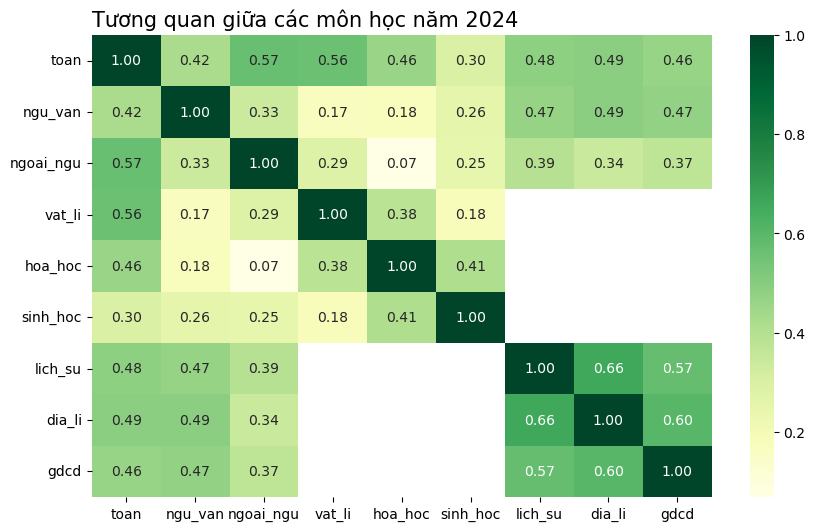

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(
    data=corr_matrix,
    annot=True,
    cmap='YlGn',
    fmt='.2f'
)
plt.title('Tương quan giữa các môn học năm 2024',loc='left',fontsize=15)
plt.show()

In [45]:
df_filtered.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year,A,A1,B,C,D
1833222,49000816,7.4,7.00,4.0,NaN,NaN,NaN,7.50,7.0,9.5,N1,2023,NaN,NaN,NaN,21.5,18.40
2955486,53002614,8.6,7.75,3.4,6.50,6.75,7.0,NaN,NaN,NaN,N1,2024,21.85,18.50,22.35,NaN,19.75
1144888,2047353,6.4,7.75,NaN,6.25,6.25,7.5,NaN,NaN,NaN,NaN,2023,18.90,NaN,20.15,NaN,NaN
2732731,38011703,4.0,3.25,3.0,NaN,NaN,NaN,5.75,7.0,5.5,N1,2024,NaN,NaN,NaN,16.0,10.25
2494499,25010171,6.8,7.25,5.4,6.25,3.50,6.0,NaN,NaN,NaN,N1,2024,16.55,18.45,16.30,NaN,19.45


In [46]:
group_score=df_filtered.loc[df_filtered.year==2024,['A','A1','B','C','D']]

In [47]:
corr_matrix_2=group_score.corr()
corr_matrix_2

,A,A1,B,C,D
A,1.000000,0.756024,0.835658,NaN,0.523715
A1,0.756024,1.000000,0.552960,NaN,0.843121
B,0.835658,0.552960,1.000000,NaN,0.505494
C,NaN,NaN,NaN,1.000000,0.714681
D,0.523715,0.843121,0.505494,0.714681,1.000000


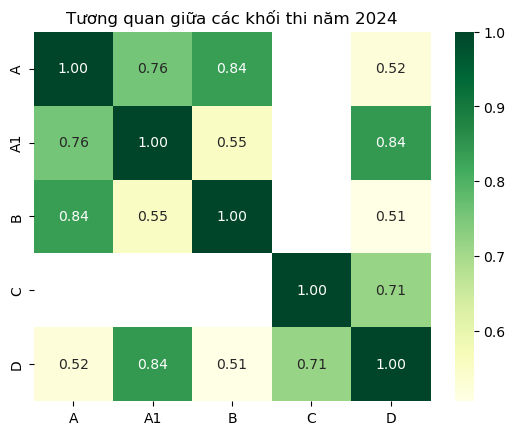

In [48]:
sns.heatmap(
    data=corr_matrix_2,
    annot=True,
    cmap='YlGn',
    fmt='.2f'
)
plt.title('Tương quan giữa các khối thi năm 2024')
plt.show()

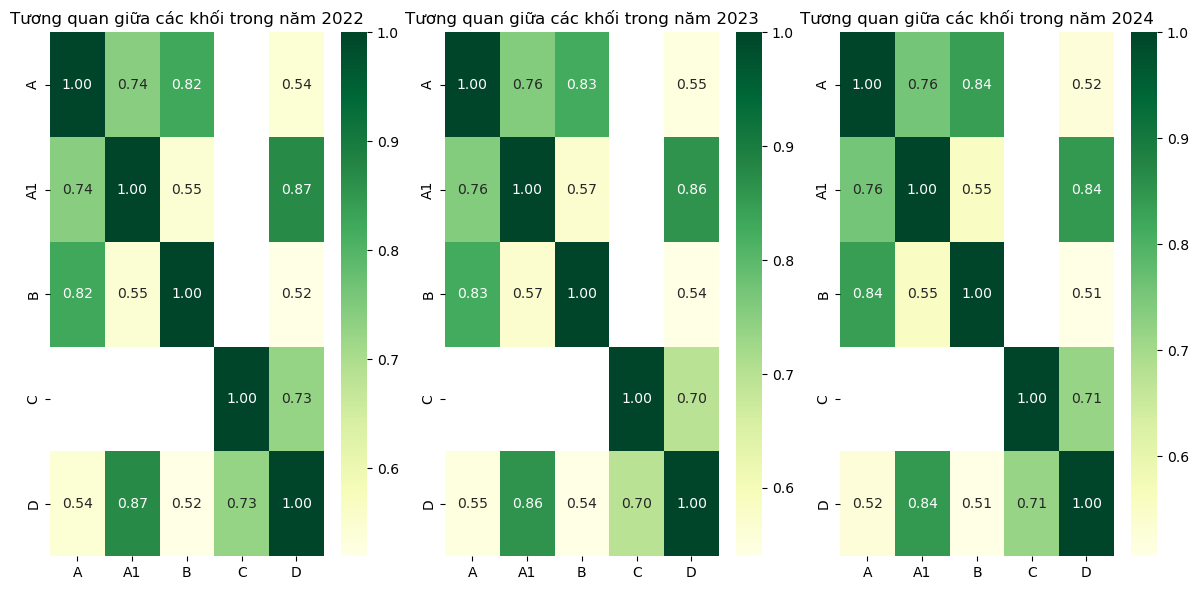

In [49]:
fig,axes=plt.subplots(1,3,figsize=(12,6))
axes=axes.flatten()
for i,year in enumerate(x_year):
    df_year=df_filtered[df_filtered.year==year]
    group_score=df_year[['A','A1','B','C','D']]
    corr_mtr=group_score.corr()
    sns.heatmap(
    data=corr_mtr,
    annot=True,
    cmap='YlGn',
    fmt='.2f',
    ax=axes[i]
    )
    axes[i].set_title(f'Tương quan giữa các khối trong năm {year}')
plt.tight_layout()
plt.show()

### Additional analysis in 2024

In [50]:
df24.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year
0,1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1,2024
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1,2024
2,1000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1,2024
3,1000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1,2024
4,1000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1,2024


In [51]:
df123=df24.copy()

In [52]:
thi_sinh = pd.DataFrame({
    'mon': subjects,
    'so_luong': [df123[col].notna().sum() for col in subjects]
})

In [53]:
thi_sinh

,mon,so_luong
0,toan,1045613
1,ngu_van,1050101
2,ngoai_ngu,912705
3,vat_li,345615
4,hoa_hoc,346518
5,sinh_hoc,342378
6,lich_su,706214
7,dia_li,704682
8,gdcd,583609


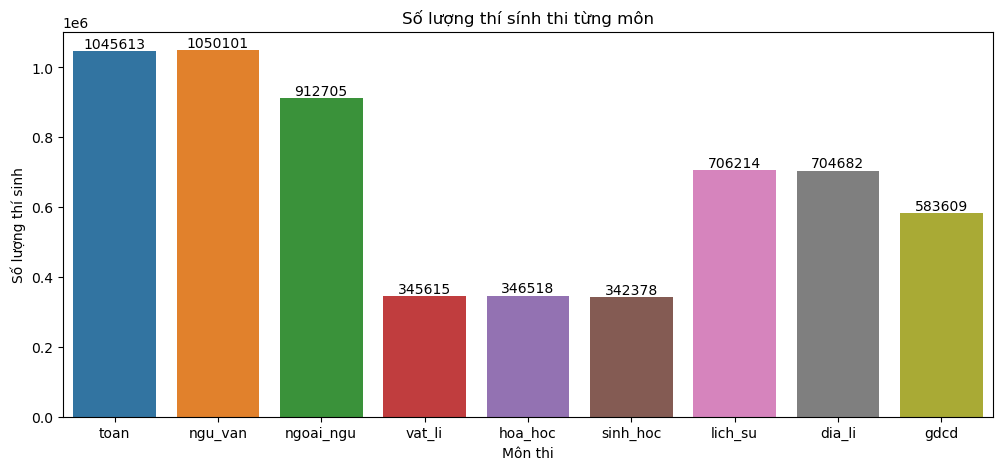

In [54]:
plt.figure(figsize=(12,5))
ax=sns.barplot(
    data=thi_sinh,
    x='mon',
    y='so_luong'
)
plt.title('Số lượng thí sính thi từng môn')
plt.xlabel('Môn thi')
plt.ylabel('Số lượng thí sinh')
plt.bar_label(ax.containers[0],fmt='%.0f')
plt.show()

In [55]:
def check(r):

    if pd.notna(r['toan']) and pd.notna(r['vat_li']) and pd.notna(r['hoa_hoc']) and pd.notna(r['sinh_hoc']):
        return 'KHTN'  

    elif pd.notna(r['ngu_van']) and pd.notna(r['lich_su']) and pd.notna(r['dia_li']) and pd.notna(r['gdcd']):
        return 'KHXH'  

    else:
        return 'TUDO' 


df123['khoi_thi'] = df123.apply(check, axis=1)


In [56]:
df123.sample(5)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year,khoi_thi
1049341,63002689,7.0,5.75,4.6,6.25,7.75,7.75,NaN,NaN,NaN,N1,2024,KHTN
455691,23008260,3.2,5.25,NaN,NaN,NaN,NaN,4.75,5.25,NaN,NaN,2024,TUDO
945141,53009793,7.0,9.00,7.8,NaN,NaN,NaN,7.50,8.50,9.25,N1,2024,KHXH
893821,50007813,7.8,8.00,4.0,7.25,8.50,6.50,NaN,NaN,NaN,N1,2024,KHTN
818997,46006192,8.6,6.00,8.6,8.00,7.00,8.00,NaN,NaN,NaN,N1,2024,KHTN


In [57]:
test_24 = df123.groupby(['khoi_thi'])['sbd'].count().reset_index()

In [58]:
test_24=test_24.rename(columns={'sbd':'so_luong'})

In [60]:
test_24['%']=round(test_24['so_luong']/len(df123)*100,2)

In [61]:
test_24

,khoi_thi,so_luong,%
0,KHTN,339780,32.01
1,KHXH,583022,54.92
2,TUDO,138803,13.07


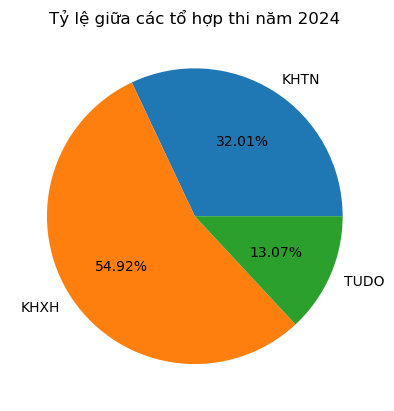

In [62]:
plt.pie(
    data=test_24,
    x='so_luong',
    labels='khoi_thi',
    autopct='%1.2f%%'
)
plt.title('Tỷ lệ giữa các tổ hợp thi năm 2024')
plt.show()